In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sqlalchemy import create_engine

In [6]:
engine = create_engine('postgresql://postgres:1@localhost:5432/postgres')

In [7]:
# Загружаем данные
query = """
SELECT
    has_site,
    review_count,
    rating,
    log_review_count,
    has_any_review,
    has_enough_reviews
FROM firms_for_analysis
"""
df = pd.read_sql(query, engine)

In [8]:
# 1. Количество фирм в группах
print(df['has_site'].value_counts(normalize=True) * 100)

has_site
True     71.341325
False    28.658675
Name: proportion, dtype: float64


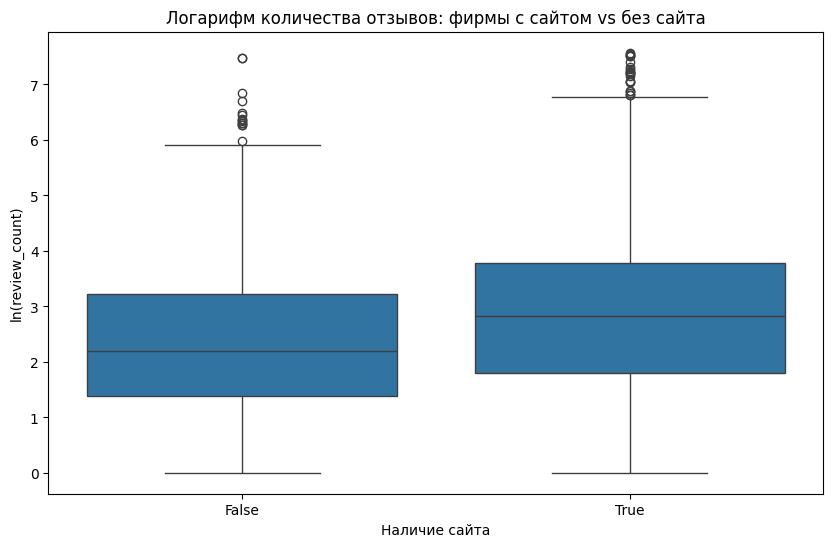

In [9]:
# 2. Боксплот (лог-шкала)
plt.figure(figsize=(10, 6))
sns.boxplot(x='has_site', y='log_review_count', data=df)
plt.title('Логарифм количества отзывов: фирмы с сайтом vs без сайта')
plt.ylabel('ln(review_count)')
plt.xlabel('Наличие сайта')
plt.savefig('boxplot_log_reviews.png', dpi=300, bbox_inches='tight')
plt.show()

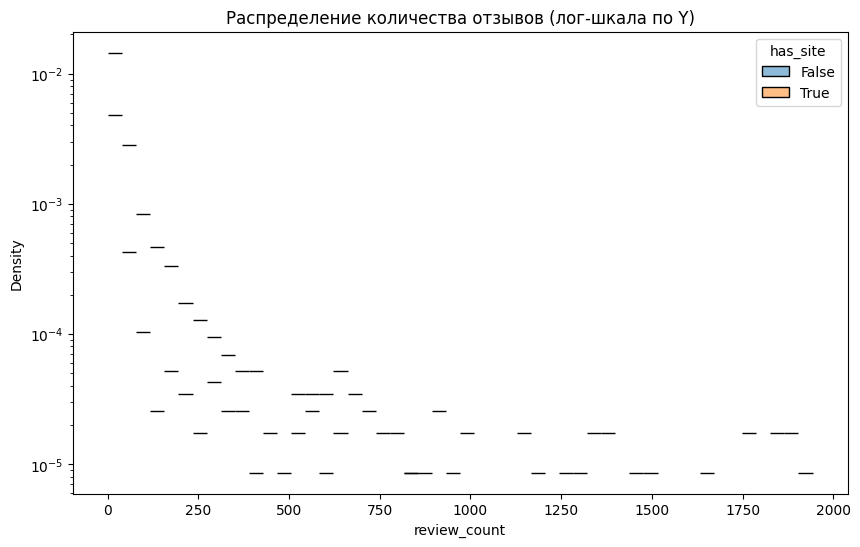

In [10]:
# 3. Гистограмма (кол-во отзывов > 0)
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['review_count'] > 0],
             x='review_count', hue='has_site',
             bins=50, log_scale=(False, True), stat='density')
plt.title('Распределение количества отзывов (лог-шкала по Y)')
plt.savefig('hist_reviews.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# 4. Средние и медианы
print(df.groupby('has_site')['review_count'].agg(['count', 'mean', 'median', 'max']))

In [ ]:
# 5. Статистический тест (Mann-Whitney U — самый подходящий)
with_site = df[df['has_site'] == True]['review_count']
without_site = df[df['has_site'] == False]['review_count']

u_stat, p_val = stats.mannwhitneyu(with_site, without_site, alternative='greater')
print(f"Mann-Whitney U test: U = {u_stat}, p-value = {p_val:.2e}")